# SerPyShock simplified notebook

In [1]:
import datetime as dt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from seppy.loader.solo import mag_load
from SerPyShock import SerPyShock
from solo_epd_loader import epd_load
from solo_swa_loader import swa_load_grnd_mom

Run `%pip install sunpy_soar` if this is missing. Restart the whole notebook afterwards.

In [21]:
path = 'data/'  # Directory for the downloaded data in this project; no need to change

In [3]:
#Set zoomed-in plotting window
start_time = pd.to_datetime('2021-11-03 13:50:00')
end_time = pd.to_datetime('2021-11-03 14:20:00')

Download magnetic field and SWA data; run the cell without editing.

In [14]:
#Download magnetic field data for the zoomed-in interval
df_mag_normal = mag_load(start_time, end_time, level='l2', data_type='normal', frame='rtn', path=path+"./mag")
df_mag_normal["B"] = np.linalg.norm(df_mag_normal[["B_RTN_0","B_RTN_1","B_RTN_2"]],axis=1)

# Download SWA data
df_swa = swa_load_grnd_mom(start_time.date(), end_time.date(), path=path)
df_swa["V"] = np.linalg.norm(df_swa[["V_RTN_0","V_RTN_1","V_RTN_2"]],axis=1)
df_swa_zoomed = df_swa.loc[(df_swa.index >= start_time) & (df_swa.index <= end_time)]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [15]:
shock_time = pd.to_datetime('2021-11-03 14:04:20')
#Select the largest upstream window (using the ipshocks.fi standard)
start_time_up  = shock_time  - dt.timedelta(minutes = 9)
end_time_up = shock_time  - dt.timedelta(minutes = 1)
#Select the largest downstream window (using the ipshocks.fi standard)
start_time_down  = shock_time  + dt.timedelta(minutes = 2)
end_time_down = shock_time  + dt.timedelta(minutes = 10)

In [16]:
#Select minimum and maximum durations of the upstream and downstream windows
#for the systematic analysis
min_dur_up = dt.timedelta(minutes=2)
max_dur_up = end_time_up - start_time_up
min_dur_down =  dt.timedelta(minutes=2)
max_dur_down = end_time_down - start_time_down
#Select the cadence by which the window lengths are increased
cadence =  dt.timedelta(seconds=20)

In [17]:
#Prepare the input parameters for SerPyShock
B = df_mag_normal[["B_RTN_0","B_RTN_1","B_RTN_2"]].values
B_times = df_mag_normal.index
V = df_swa_zoomed[["V_RTN_0","V_RTN_1","V_RTN_2"]].values
n = df_swa_zoomed["N"].values
Tp = df_swa_zoomed["T"].values
mom_times = df_swa_zoomed.index
coord = "RTN"
B_times

DatetimeIndex(['2021-11-03 00:00:00.099999', '2021-11-03 00:00:00.225003',
               '2021-11-03 00:00:00.349998', '2021-11-03 00:00:00.475002',
               '2021-11-03 00:00:00.599996', '2021-11-03 00:00:00.725001',
               '2021-11-03 00:00:00.849995', '2021-11-03 00:00:00.974999',
               '2021-11-03 00:00:01.100004', '2021-11-03 00:00:01.224998',
               ...
               '2021-11-03 23:59:58.768001', '2021-11-03 23:59:58.892995',
               '2021-11-03 23:59:59.017999', '2021-11-03 23:59:59.143004',
               '2021-11-03 23:59:59.267998', '2021-11-03 23:59:59.393002',
               '2021-11-03 23:59:59.517996', '2021-11-03 23:59:59.643001',
               '2021-11-03 23:59:59.767995', '2021-11-03 23:59:59.892999'],
              dtype='datetime64[ns]', name='EPOCH', length=691207, freq=None)

In [18]:
#Run SerPyShock systematic calculations
n, tbn, rB, ex = SerPyShock.MX_stats(B_times, B, mom_times, V, shock_time, end_time_up, start_time_down, min_dur_up, max_dur_up, min_dur_down, max_dur_down, cadence, coord)

Upstream windows = 0 / 18
Upstream windows = 1 / 18
Upstream windows = 2 / 18
Upstream windows = 3 / 18
Upstream windows = 4 / 18
Upstream windows = 5 / 18
Upstream windows = 6 / 18
Upstream windows = 7 / 18
Upstream windows = 8 / 18
Upstream windows = 9 / 18
Upstream windows = 10 / 18
Upstream windows = 11 / 18
Upstream windows = 12 / 18
Upstream windows = 13 / 18
Upstream windows = 14 / 18
Upstream windows = 15 / 18
Upstream windows = 16 / 18
Upstream windows = 17 / 18


(0.0, 90.0)

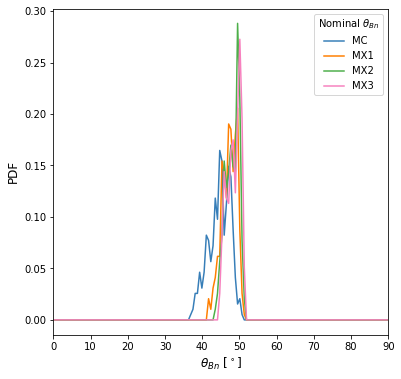

In [22]:
#Plot theta_bn diagnostics
fig = plt.figure(figsize = (6,6))
CB = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
nbns = 150
hist1,bin_edges = np.histogram(tbn.MC, bins = nbns, range=(0,90), density=True)
hist2,bin_edges = np.histogram(tbn.MX1, bins = nbns, range=(0,90), density=True)
hist3,bin_edges = np.histogram(tbn.MX2, bins = nbns, range=(0,90), density=True)
hist4,bin_edges = np.histogram(tbn.MX3, bins = nbns, range=(0,90), density=True)

bin_centers = bin_edges[0:-1] + (bin_edges[1:]-bin_edges[0:-1])/2

plt.plot(bin_centers,hist1, color = CB[0], label = 'MC')
plt.plot(bin_centers,hist2, color = CB[1], label = 'MX1')
plt.plot(bin_centers,hist3, color = CB[2], label = 'MX2')
plt.plot(bin_centers,hist4, color = CB[3], label = 'MX3')

plt.xlabel(r'$\theta_{Bn}$ $[^\circ]$',fontsize=12)
plt.ylabel(r'PDF',fontsize=12)
plt.legend(fontsize=10,title = r'Nominal $\theta_{Bn}$')
plt.xlim(0,90)

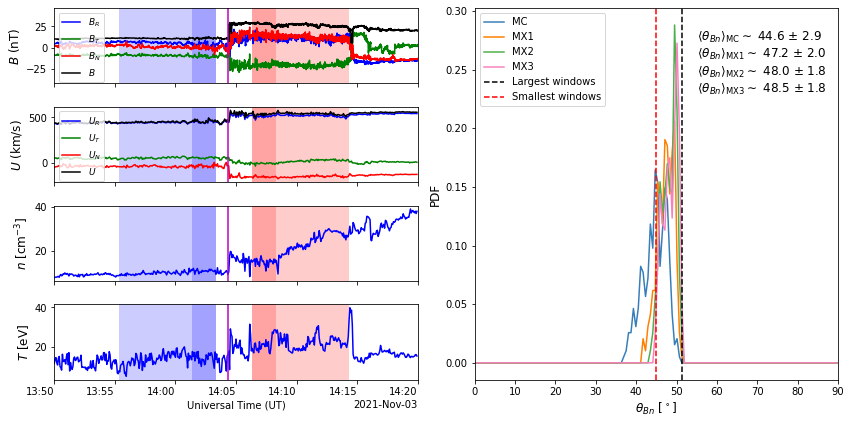

In [20]:
plt.rcParams.update({'font.size': 10})

#Determine the limits of the upstream and downstream windows, smallest and largest
sldu = int(np.floor((max_dur_up-min_dur_up)/cadence)) 
sldd = int(np.floor((max_dur_down-min_dur_down)/cadence))
stut_min = end_time_up - min_dur_up - 0*cadence
stut_max = end_time_up - min_dur_up - sldu*cadence
endt_min = start_time_down + min_dur_down + 0*cadence
endt_max = start_time_down + min_dur_down + sldd*cadence

fsax = 12 #fontsize ax 
fig = plt.figure(figsize = (12,6))
gs = fig.add_gridspec(4,2)

ax1 = fig.add_subplot(gs[0, 0])
df_mag_normal[["B_RTN_0","B_RTN_1","B_RTN_2","B"]].plot(ax=ax1,color=["blue","green","red","black"])
ax1.set_ylabel("$B$ (nT)",fontsize=fsax)
ax1.legend(loc='upper left', fontsize=9,labels=["$B_R$","$B_T$","$B_N$","$B$"])

ax2 = fig.add_subplot(gs[1, 0])
df_swa_zoomed[["V_RTN_0","V_RTN_1","V_RTN_2","V"]].plot(ax=ax2,color=["blue","green","red","black"])
ax2.set_ylabel("$U$ (km/s)", fontsize=fsax)
ax2.legend(loc='upper left', fontsize=9,labels=["$U_R$","$U_T$","$U_N$","$U$"])

ax3 = fig.add_subplot(gs[2, 0])
df_swa_zoomed["N"].plot(ax=ax3,color="b")
ax3.set_ylabel('$n$ [cm$^{-3}$]',fontsize=fsax)

ax4 = fig.add_subplot(gs[3, 0])
df_swa_zoomed["T"].plot(ax=ax4,color="b",rot=0)
ax4.set_ylabel('$T$ [eV]',fontsize=fsax)
ax4.set_xlabel("Universal Time (UT)")
locator = mdates.AutoDateLocator()
ax4.xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator))

for ax in [ax1,ax2,ax3,ax4]:
    ax.axvline(x=shock_time,color='m')
    ax.axvspan(stut_min,end_time_up, facecolor = 'b', alpha = 0.2)
    ax.axvspan(stut_max,end_time_up, facecolor = 'b', alpha = 0.2)
    ax.axvspan(start_time_down,endt_min, facecolor = 'r', alpha = 0.2)
    ax.axvspan(start_time_down,endt_max, facecolor = 'r', alpha = 0.2)
    ax.set_xlim(start_time,end_time)
    if ax!=ax4:
        ax.set_xticklabels('')
        ax.set_xlabel('')

ax5 = fig.add_subplot(gs[0:5, 1])
CB = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
ax5.plot(bin_centers,hist1, color = CB[0], label = 'MC')
ax5.plot(bin_centers,hist2, color = CB[1], label = 'MX1')
ax5.plot(bin_centers,hist3, color = CB[2], label = 'MX2')
ax5.plot(bin_centers,hist4, color = CB[3], label = 'MX3')
ax5.axvline(x=ex.tbn_luld,linestyle = '--',color='black', label = 'Largest windows')
ax5.axvline(x=ex.tbn_susd,linestyle = '--',color='red',   label = 'Smallest windows')
ax5.set_xlabel(r'$\theta_{Bn}$ $[^\circ]$',fontsize=fsax)
ax5.set_ylabel(r'PDF',fontsize=fsax)
ax5.legend(fontsize=10, loc='upper left')

values = [tbn.MC,tbn.MX1,tbn.MX2,tbn.MX3]
labels = ["MC","MX1","MX2","MX3"]
i = 0
for value,label in zip(values,labels):
    avg = np.mean(value)
    std = np.std(value)
    st = '$\langle \\theta_{Bn} \\rangle_{\mathrm{%s}} \sim $ %0.1f $\pm $ %0.1f' %(label,avg,std)
    plt.text(55,0.275-i*0.015,st,fontsize=12)
    i += 1

ax5.set_xlim(0,90)

plt.tight_layout()
plt.savefig('ONov3.jpg')